# Sree Ram Roshan A S - 24BAD113

# Scenario - 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

nltk.download('stopwords', quiet=True)

True

In [5]:
file_path = '/kaggle/input/datasets/organizations/uciml/sms-spam-collection-dataset/spam.csv'
df = pd.read_csv(file_path, encoding='latin-1')

In [6]:
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [7]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Text cleaning (lowercase)
    text = text.lower()
    # Punctuation removal
    text = "".join([char for char in text if char not in string.punctuation])
    # Stopword removal
    text = " ".join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_message'] = df['message'].apply(preprocess_text)

In [8]:
df['label_encoded'] = df['label'].map({'ham': 0, 'spam': 1})

In [9]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['cleaned_message'])
y = df['label_encoded']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
mnb = MultinomialNB() 
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

In [12]:
print("Model Performance")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}\n")

Model Performance
Accuracy:  0.9758
Precision: 0.9073
Recall:    0.9133
F1 Score:  0.9103



In [13]:
print("Misclassified Examples Analysis")
misclassified_idx = np.where(y_test != y_pred)[0]

for idx in misclassified_idx[:3]:
    original_idx = y_test.index[idx]
    actual = "Spam" if y_test.loc[original_idx] == 1 else "Ham"
    predicted = "Spam" if y_pred[idx] == 1 else "Ham"
    print(f"Actual: {actual} | Predicted: {predicted}")
    print(f"Message: {df.loc[original_idx, 'message']}\n")

Misclassified Examples Analysis
Actual: Ham | Predicted: Spam
Message: K:)eng rocking in ashes:)

Actual: Ham | Predicted: Spam
Message: 1Apple/Day=No Doctor. 1Tulsi Leaf/Day=No Cancer. 1Lemon/Day=No Fat. 1Cup Milk/day=No Bone Problms 3 Litres Watr/Day=No Diseases Snd ths 2 Whom U Care..:-)

Actual: Ham | Predicted: Spam
Message: I liked the new mobile



In [14]:
print("Laplace Smoothing Impact")
alphas = [0.001, 0.1, 1.0, 5.0]
for a in alphas:
    test_mnb = MultinomialNB(alpha=a)
    test_mnb.fit(X_train, y_train)
    test_pred = test_mnb.predict(X_test)
    print(f"Alpha = {a:<5} | Accuracy = {accuracy_score(y_test, test_pred):.4f} | Precision = {precision_score(y_test, test_pred):.4f}")

Laplace Smoothing Impact
Alpha = 0.001 | Accuracy = 0.9767 | Precision = 0.8974
Alpha = 0.1   | Accuracy = 0.9758 | Precision = 0.8868
Alpha = 1.0   | Accuracy = 0.9758 | Precision = 0.9073
Alpha = 5.0   | Accuracy = 0.9776 | Precision = 0.9771


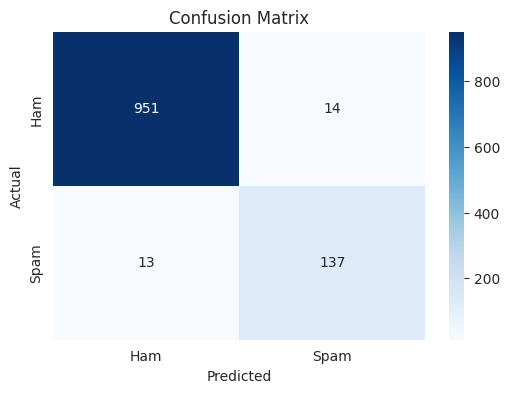

In [15]:
sns.set_style("whitegrid")

# 1. Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

/tmp/ipykernel_55/3035573819.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_spam_probs, y=top_spam_words, palette='Reds_r')


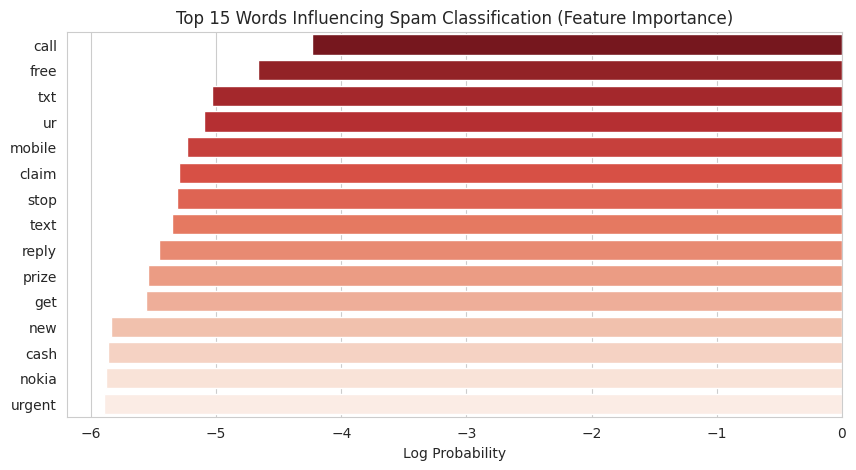

In [16]:
spam_log_probs = mnb.feature_log_prob_[1]
feature_names = vectorizer.get_feature_names_out()

spam_features = sorted(zip(spam_log_probs, feature_names), reverse=True)
top_spam_words = [word for prob, word in spam_features[:15]]
top_spam_probs = [prob for prob, word in spam_features[:15]]

plt.figure(figsize=(10, 5))
sns.barplot(x=top_spam_probs, y=top_spam_words, palette='Reds_r')
plt.title('Top 15 Words Influencing Spam Classification (Feature Importance)')
plt.xlabel('Log Probability')
plt.show()

/tmp/ipykernel_55/2422274916.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=[freq for word, freq in top_ham], y=[word for word, freq in top_ham], palette='Greens_r')
/tmp/ipykernel_55/2422274916.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x=[freq for word, freq in top_spam], y=[word for word, freq in top_spam], palette='Reds_r')


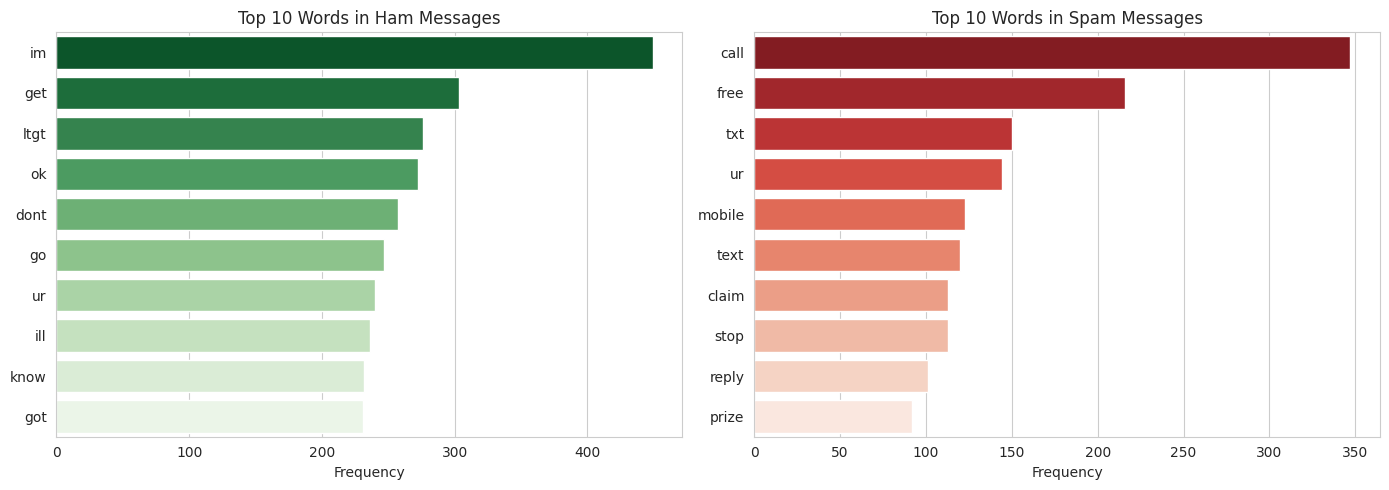

In [18]:
spam_df = df[df['label'] == 'spam']['cleaned_message']
ham_df = df[df['label'] == 'ham']['cleaned_message']

def get_top_n_words(corpus, n=10):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

top_spam = get_top_n_words(spam_df, 10)
top_ham = get_top_n_words(ham_df, 10)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(ax=axes[0], x=[freq for word, freq in top_ham], y=[word for word, freq in top_ham], palette='Greens_r')
axes[0].set_title('Top 10 Words in Ham Messages')
axes[0].set_xlabel('Frequency')

# Plot Spam
sns.barplot(ax=axes[1], x=[freq for word, freq in top_spam], y=[word for word, freq in top_spam], palette='Reds_r')
axes[1].set_title('Top 10 Words in Spam Messages')
axes[1].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

# Scenario 2

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [20]:
iris = load_iris()
# Convert to DataFrame for easier inspection
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Species')

In [21]:
print("--- Data Inspection ---")
print(X.head())
print("\nMissing Values:")
print(X.isnull().sum())
print("-" * 30)

--- Data Inspection ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

Missing Values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
------------------------------


In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [24]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [25]:
print("\n--- Gaussian NB Performance ---")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_gnb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gnb, average='macro'):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_gnb, average='macro'):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_gnb, average='macro'):.4f}")


--- Gaussian NB Performance ---
Accuracy:  0.9778
Precision: 0.9762
Recall:    0.9744
F1 Score:  0.9743


In [26]:
print("--- Compare Predictions (First 10 Samples) ---")
comparison_df = pd.DataFrame({'Actual_Class': y_test.values, 'Predicted_Class': y_pred_gnb})

# Map numeric classes back to actual flower names for readability

comparison_df['Actual_Name'] = comparison_df['Actual_Class'].map(dict(enumerate(iris.target_names)))
comparison_df['Predicted_Name'] = comparison_df['Predicted_Class'].map(dict(enumerate(iris.target_names)))
print(comparison_df[['Actual_Name', 'Predicted_Name']].head(10))


--- Compare Predictions (First 10 Samples) ---
  Actual_Name Predicted_Name
0  versicolor     versicolor
1      setosa         setosa
2   virginica      virginica
3  versicolor     versicolor
4  versicolor     versicolor
5      setosa         setosa
6  versicolor     versicolor
7   virginica      virginica
8  versicolor     versicolor
9  versicolor     versicolor


In [27]:
print("\n--- Class Probabilities (First 5 Test Samples) ---")
probs = gnb.predict_proba(X_test[:5])
prob_df = pd.DataFrame(probs, columns=iris.target_names)
print(prob_df.round(4))


--- Class Probabilities (First 5 Test Samples) ---
   setosa  versicolor  virginica
0     0.0      0.9955     0.0045
1     1.0      0.0000     0.0000
2     0.0      0.0000     1.0000
3     0.0      0.9749     0.0251
4     0.0      0.8319     0.1681


In [28]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("--- Model Comparison ---")
print(f"Gaussian NB Accuracy:  {accuracy_score(y_test, y_pred_gnb):.4f}")
print(f"Logistic Reg Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")


--- Model Comparison ---
Gaussian NB Accuracy:  0.9778
Logistic Reg Accuracy: 1.0000


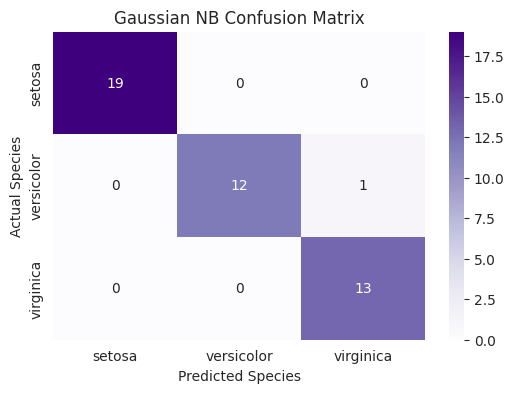

In [29]:
sns.set_style("whitegrid")

# 1. Confusion Matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred_gnb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Gaussian NB Confusion Matrix')
plt.xlabel('Predicted Species')
plt.ylabel('Actual Species')
plt.show()

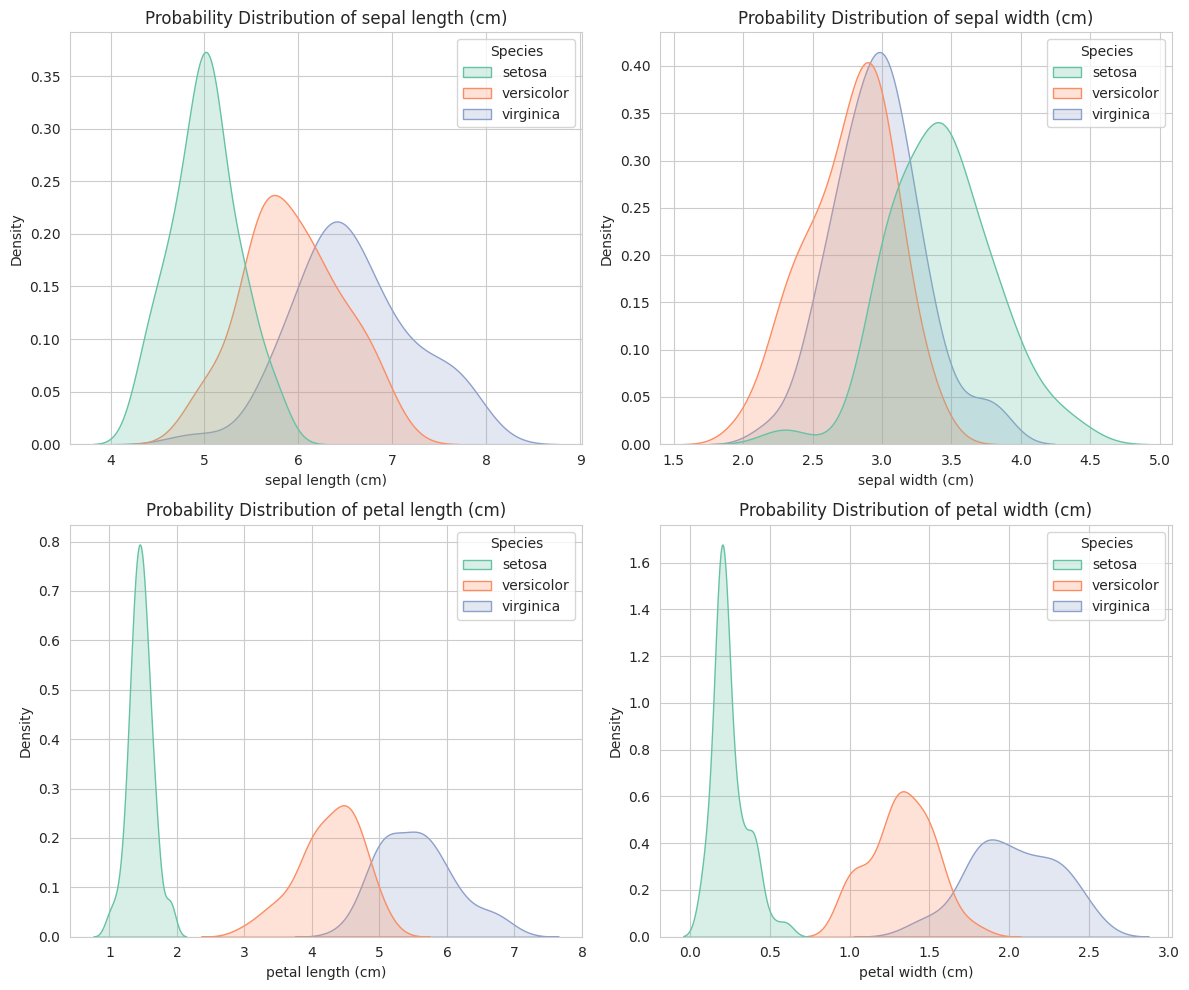

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()
# Using unscaled data for clearer axis labels
X_df_unscaled = pd.DataFrame(iris.data, columns=iris.feature_names)
X_df_unscaled['Species'] = [iris.target_names[i] for i in iris.target]

for i, feature in enumerate(iris.feature_names):
    sns.kdeplot(data=X_df_unscaled, x=feature, hue="Species", fill=True, ax=axes[i], palette="Set2")
    axes[i].set_title(f'Probability Distribution of {feature}')
plt.tight_layout()
plt.show()

In [32]:
X_2d = X.iloc[:, [2, 3]].values  
y_2d = y.values

scaler_2d = StandardScaler()
X_2d_scaled = scaler_2d.fit_transform(X_2d)

gnb_2d = GaussianNB()
gnb_2d.fit(X_2d_scaled, y_2d)

GaussianNB()

In [34]:
plt.figure(figsize=(8, 6))
x_min, x_max = X_2d_scaled[:, 0].min() - 1, X_2d_scaled[:, 0].max() + 1
y_min, y_max = X_2d_scaled[:, 1].min() - 1, X_2d_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Predict across the grid
Z = gnb_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

<Figure size 800x600 with 0 Axes>

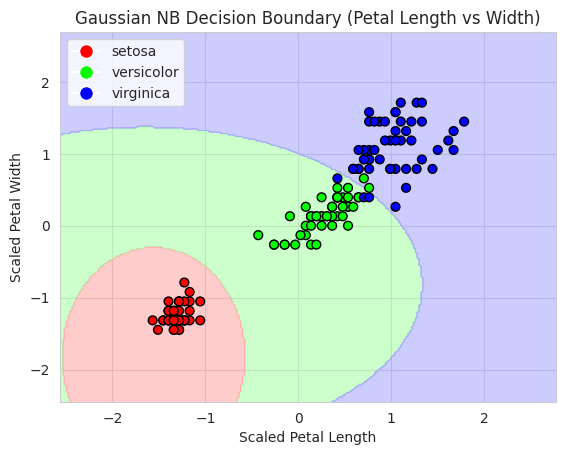

In [35]:
plt.contourf(xx, yy, Z, cmap=cmap_light, alpha=0.6)
scatter = plt.scatter(X_2d_scaled[:, 0], X_2d_scaled[:, 1], c=y_2d, cmap=cmap_bold, edgecolor='k', s=40)
plt.title("Gaussian NB Decision Boundary (Petal Length vs Width)")
plt.xlabel("Scaled Petal Length")
plt.ylabel("Scaled Petal Width")

handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap_bold.colors[i], markersize=10) for i in range(3)]
plt.legend(handles, iris.target_names, loc='upper left')
plt.show()